### Example of Reaction Constructor

Reagent A (Amine)/ Reagent B (Carboxylic Acid)

- h: hybridization ("sp3", "sp2", **"aro"**)
- X: Reacting atom(s) (A: 1, (1,2), (1,3) for the carbon chain) 
                      (B: "NH2", "OH", "alpha", "beta")
- Y: Modification (B: "-O" or "-N")

$$
^{h}A^{X}/ ^hB^{XY}
$$

In [2]:
from rdkit import Chem
import pandas as pd
from rdkit.Chem import Draw, AllChem, PandasTools
# Allow mol pics in dataframe
#PandasTools.ChangeMoleculeRendering(renderer='PNG')
#PandasTools.RenderImagesInAllDataFrames(images=True)

from matplotlib import pyplot as plt

# Suppress waring messeges
from rdkit import RDLogger
lg = RDLogger.logger()
lg.setLevel(RDLogger.CRITICAL)

In [4]:
import importlib
import itertools
import rxnGen
importlib.reload(rxnGen)
from reactants import Carbon, Amine, Alcohol, Carboxyl, Bromide, Boronate
from rxnGen import  Product, GetRxn, Enumerator

In [5]:
from itertools import combinations, permutations, product

In [2]:
fluorene = Chem.MolFromSmiles('C12=CC=CC=C1CC3=C2C=CC=C3')
carbazole = Chem.MolFromSmiles('C12=CC=CC=C1NC3=C2C=CC=C3')
dibenzofuran = Chem.MolFromSmiles('C12=CC=CC=C1OC3=C2C=CC=C3')

dihydroanthracene = Chem.MolFromSmiles('C12=CC=CC=C1CC3=C(C=CC=C3)C2')
dihydroacridine = Chem.MolFromSmiles('C12=CC=CC=C1NC3=C(C=CC=C3)C2')
xanthene = Chem.MolFromSmiles('C12=CC=CC=C1OC3=C(C=CC=C3)C2')

dibenzoannulene = Chem.MolFromSmiles('C12=CC=CC=C1CC3=C(C=CC=C3)C=C2')
dibenzazepine = Chem.MolFromSmiles('C12=CC=CC=C1C=CC3=C(C=CC=C3)N2')
dibenzooxepine = Chem.MolFromSmiles('C12=CC=CC=C1OC3=C(C=CC=C3)C=C2')

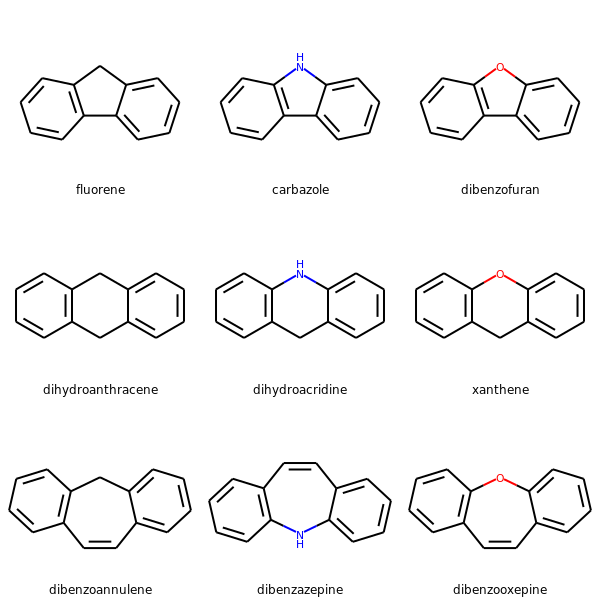

In [3]:
polycyclics = [fluorene, carbazole, dibenzofuran, dihydroanthracene, dihydroacridine, xanthene, dibenzoannulene, dibenzazepine, dibenzooxepine]
labels = ['fluorene', 'carbazole', 'dibenzofuran', 'dihydroanthracene', 'dihydroacridine', 'xanthene', 'dibenzoannulene', 'dibenzazepine', 'dibenzooxepine']
Draw.MolsToGridImage(polycyclics, legends = labels)

The 7-membered ring needs a 4-carbon chain or gamma-carbons, this has not been implemented yet.

In [13]:
from enumRxn import enumProds, drawProds

In [6]:
df = Enumerator('Carbon','Carboxyl').MakeDataFrame()
df

,A B Configs,A,B,rxn SMARTS,Product,rxn
0,"((sp3, 1), (sp3, 1, None))",[C:1],[C:23]-[C:22]-[C:21](-[O:24])=[O:25],[C:1] . [C:23]-[C:22]-[C:21](-[O:24])=[O:25] >...,"<img data-content=""rdkit/molecule"" src=""data:i...",<rdkit.Chem.rdChemReactions.ChemicalReaction o...
1,"((sp3, 1), (sp3, 1, -OH))",[C:1],[C:23]-[C:22]-[C:21](-[O:24])=[O:25],[C:1] . [C:23]-[C:22]-[C:21](-[O:24])=[O:25] >...,"<img data-content=""rdkit/molecule"" src=""data:i...",<rdkit.Chem.rdChemReactions.ChemicalReaction o...
2,"((sp3, 1), (sp3, 1, +H))",[C:1],[C:23]-[C:22]-[C:21](-[O:24])=[O:25],[C:1] . [C:23]-[C:22]-[C:21](-[O:24])=[O:25] >...,"<img data-content=""rdkit/molecule"" src=""data:i...",<rdkit.Chem.rdChemReactions.ChemicalReaction o...
3,"((sp3, 1), (sp3, 1, +H2))",[C:1],[C:23]-[C:22]-[C:21](-[O:24])=[O:25],[C:1] . [C:23]-[C:22]-[C:21](-[O:24])=[O:25] >...,"<img data-content=""rdkit/molecule"" src=""data:i...",<rdkit.Chem.rdChemReactions.ChemicalReaction o...
4,"((sp3, 1), (sp3, 2, None))",[C:1],[C:23]-[C:22]-[C:21](-[O:24])=[O:25],[C:1] . [C:23]-[C:22]-[C:21](-[O:24])=[O:25] >...,"<img data-content=""rdkit/molecule"" src=""data:i...",<rdkit.Chem.rdChemReactions.ChemicalReaction o...
...,...,...,...,...,...,...
1023,"((sp2, (3, 1)), (sp2, (4, 3), +H))",[c:1][c:2][c:3],[c:23][c:22]-[C:21](-[O:24])=[O:25],[c:1][c:2][c:3] . [c:23][c:22]-[C:21](-[O:24])...,"<img data-content=""rdkit/molecule"" src=""data:i...",<rdkit.Chem.rdChemReactions.ChemicalReaction o...
1024,"((sp2, (3, 1)), (sp2, (4, 3), +H2))",[C:1]=[C:2]-[C:3],[C:23]=[C:22]-[C:21](-[O:24])=[O:25],[C:1]=[C:2]-[C:3] . [C:23]=[C:22]-[C:21](-[O:2...,"<img data-content=""rdkit/molecule"" src=""data:i...",<rdkit.Chem.rdChemReactions.ChemicalReaction o...
1025,"((sp2, (3, 1)), (sp2, (4, 3), +H2))",[C:1]=[C:2]-[C:3],[c:23][c:22]-[C:21](-[O:24])=[O:25],[C:1]=[C:2]-[C:3] . [c:23][c:22]-[C:21](-[O:24...,"<img data-content=""rdkit/molecule"" src=""data:i...",<rdkit.Chem.rdChemReactions.ChemicalReaction o...
1026,"((sp2, (3, 1)), (sp2, (4, 3), +H2))",[c:1][c:2][c:3],[c:23][c:22]-[C:21](-[O:24])=[O:25],[c:1][c:2][c:3] . [c:23][c:22]-[C:21](-[O:24])...,"<img data-content=""rdkit/molecule"" src=""data:i...",<rdkit.Chem.rdChemReactions.ChemicalReaction o...


In [7]:
df_unique = df.drop_duplicates('rxn SMARTS')
df_unique

,A B Configs,A,B,rxn SMARTS,Product,rxn
0,"((sp3, 1), (sp3, 1, None))",[C:1],[C:23]-[C:22]-[C:21](-[O:24])=[O:25],[C:1] . [C:23]-[C:22]-[C:21](-[O:24])=[O:25] >...,"<img data-content=""rdkit/molecule"" src=""data:i...",<rdkit.Chem.rdChemReactions.ChemicalReaction o...
1,"((sp3, 1), (sp3, 1, -OH))",[C:1],[C:23]-[C:22]-[C:21](-[O:24])=[O:25],[C:1] . [C:23]-[C:22]-[C:21](-[O:24])=[O:25] >...,"<img data-content=""rdkit/molecule"" src=""data:i...",<rdkit.Chem.rdChemReactions.ChemicalReaction o...
2,"((sp3, 1), (sp3, 1, +H))",[C:1],[C:23]-[C:22]-[C:21](-[O:24])=[O:25],[C:1] . [C:23]-[C:22]-[C:21](-[O:24])=[O:25] >...,"<img data-content=""rdkit/molecule"" src=""data:i...",<rdkit.Chem.rdChemReactions.ChemicalReaction o...
3,"((sp3, 1), (sp3, 1, +H2))",[C:1],[C:23]-[C:22]-[C:21](-[O:24])=[O:25],[C:1] . [C:23]-[C:22]-[C:21](-[O:24])=[O:25] >...,"<img data-content=""rdkit/molecule"" src=""data:i...",<rdkit.Chem.rdChemReactions.ChemicalReaction o...
4,"((sp3, 1), (sp3, 2, None))",[C:1],[C:23]-[C:22]-[C:21](-[O:24])=[O:25],[C:1] . [C:23]-[C:22]-[C:21](-[O:24])=[O:25] >...,"<img data-content=""rdkit/molecule"" src=""data:i...",<rdkit.Chem.rdChemReactions.ChemicalReaction o...
...,...,...,...,...,...,...
851,"((sp2, (1, 3)), (sp2, (4, 3), +H))",[c:1][c:2][c:3],[c:23][c:22]-[C:21](-[O:24])=[O:25],[c:1][c:2][c:3] . [c:23][c:22]-[C:21](-[O:24])...,"<img data-content=""rdkit/molecule"" src=""data:i...",<rdkit.Chem.rdChemReactions.ChemicalReaction o...
852,"((sp2, (1, 3)), (sp2, (4, 3), +H2))",[C:1]=[C:2]-[C:3],[C:23]=[C:22]-[C:21](-[O:24])=[O:25],[C:1]=[C:2]-[C:3] . [C:23]=[C:22]-[C:21](-[O:2...,"<img data-content=""rdkit/molecule"" src=""data:i...",<rdkit.Chem.rdChemReactions.ChemicalReaction o...
853,"((sp2, (1, 3)), (sp2, (4, 3), +H2))",[C:1]=[C:2]-[C:3],[c:23][c:22]-[C:21](-[O:24])=[O:25],[C:1]=[C:2]-[C:3] . [c:23][c:22]-[C:21](-[O:24...,"<img data-content=""rdkit/molecule"" src=""data:i...",<rdkit.Chem.rdChemReactions.ChemicalReaction o...
854,"((sp2, (1, 3)), (sp2, (4, 3), +H2))",[c:1][c:2][c:3],[c:23][c:22]-[C:21](-[O:24])=[O:25],[c:1][c:2][c:3] . [c:23][c:22]-[C:21](-[O:24])...,"<img data-content=""rdkit/molecule"" src=""data:i...",<rdkit.Chem.rdChemReactions.ChemicalReaction o...


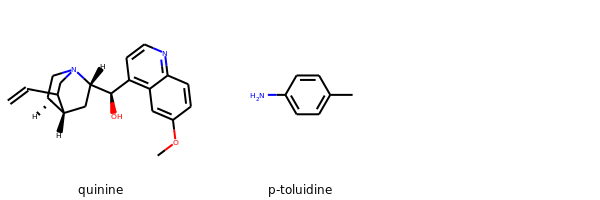

In [160]:
quinine = Chem.MolFromSmiles('COC1=CC2=C(C=CN=C2C=C1)[C@H]([C@@H]3C[C@@H]4CCN3C[C@@H]4C=C)O')
p_toluidine = Chem.MolFromSmiles('CC1=CC=C(C=C1)N')
reacts = (quinine,p_toluidine)

Draw.MolsToGridImage(reacts,legends = ['quinine','p-toluidine'])

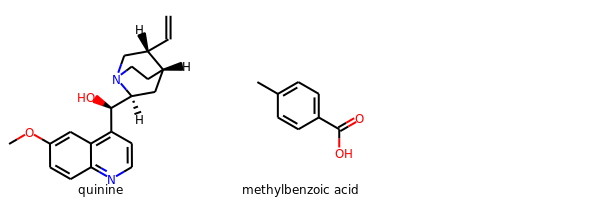

In [181]:
quinine = Chem.MolFromSmiles('COC1=CC2=C(C=CN=C2C=C1)[C@H]([C@@H]3C[C@@H]4CCN3C[C@@H]4C=C)O')
methylbenzoic = Chem.MolFromSmiles('OC(C1=CC=C(C)C=C1)=O')
reacts = (quinine,methylbenzoic)

Draw.MolsToGridImage(reacts,legends = ['quinine','methylbenzoic acid'])

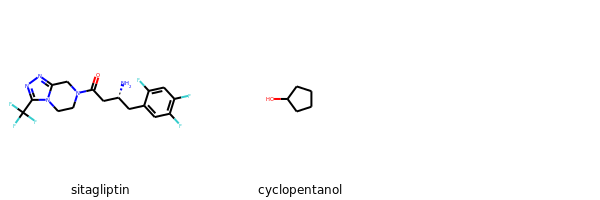

In [15]:
sitagliptin = Chem.MolFromSmiles('C1CN2C(=NN=C2C(F)(F)F)CN1C(=O)C[C@@H](CC3=CC(=C(C=C3F)F)F)N')
cyclopentanol = Chem.MolFromSmiles('C1CCC(C1)O')
reacts = (sitagliptin,cyclopentanol)

Draw.MolsToGridImage(reacts,legends = ['sitagliptin','cyclopentanol'])

In [182]:
all_smi_lists = []
rxn_configs = []
for i, rxn in enumerate(df_all['rxn']):
    products_list = rxn.RunReactants(reacts)

    total = 0
    smi_list = []
    for p in products_list:
        try:
            Chem.SanitizeMol(p[0]) 
            smi = Chem.MolToSmiles(p[0])
            mol = Chem.MolFromSmiles(smi)
            smi_list.append(Chem.MolToSmiles(mol))
            rxn_configs.append(df_all['A B Configs'].iloc[i])
        except:
            pass
    all_smi_lists.append(smi_list)
    total += len(smi_list)
    
valid_lists = [list(set(l)) for l in all_smi_lists if l]

In [183]:
len(list(set(rxn_configs)))

28

In [184]:
all_smi = []
for l in valid_lists:
    all_smi.extend(l)

unique = list(set(all_smi))

len(unique)

118

was 107

In [131]:
counter = 0
used_rxn = []
for i, l in enumerate(prodlists):
    if l:
        counter+=1
        used_rxn.append(i)

In [132]:
print(counter)

51


In [176]:
drawMols = [Chem.MolFromSmiles(smi) for smi in unique]

In [177]:
AllChem.SetPreferCoordGen(True)
pic1 = Draw.MolsToGridImage(drawMols[:50])
pic2 = Draw.MolsToGridImage(drawMols[50:100])
pic3 = Draw.MolsToGridImage(drawMols[100:150])
pic4 = Draw.MolsToGridImage(drawMols[150:200])
pic1.save('quinine_toluidine1.png')
pic2.save('quinine_toluidine2.png')
pic3.save('quinine_toluidine3.png')
pic4.save('quinine_toluidine4.png')

Matched: 62


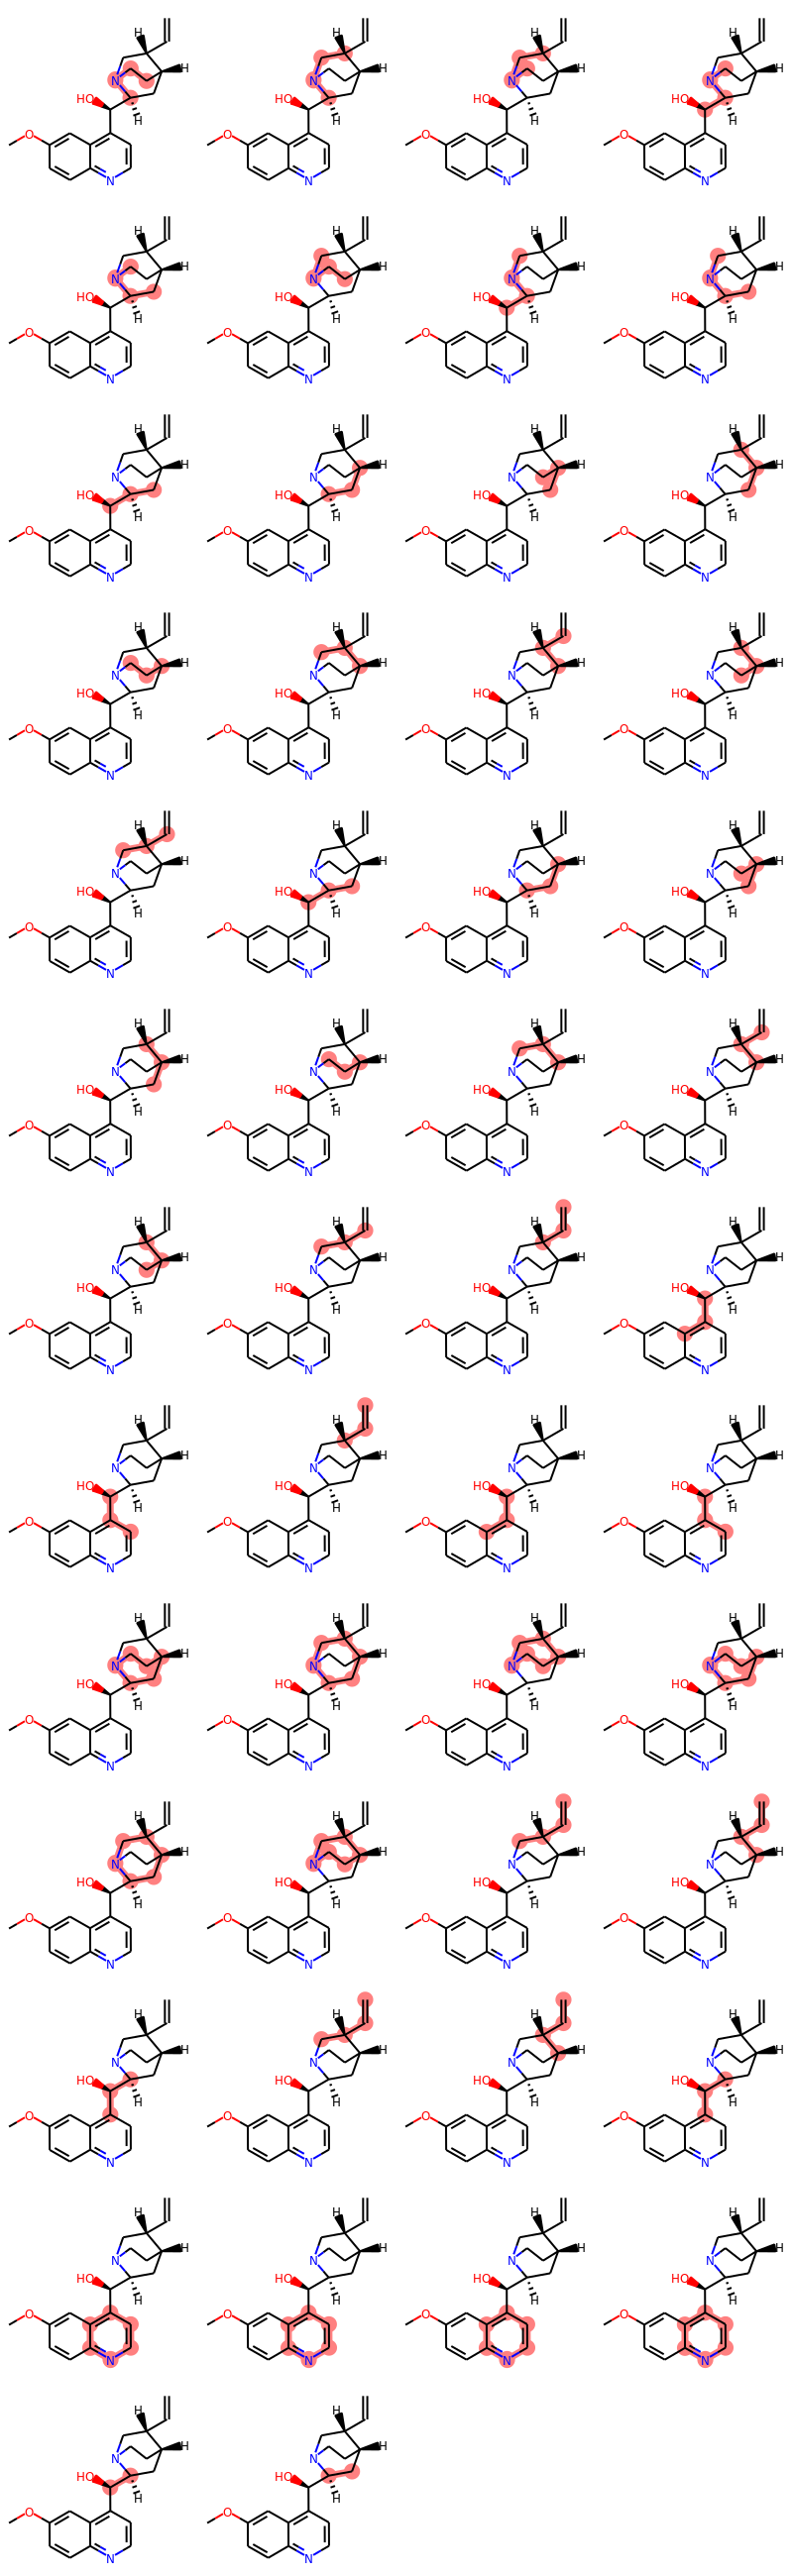

In [178]:
matches = []
rxn_idx = []
for i,prod in enumerate(df_unique['Product']):
    match = quinine.GetSubstructMatches(prod)
    if len(match) > 0:
        matches.extend(match)
        rxn_idx.append(i)

print('Matched:', len(matches))


mols = [quinine for m in matches]
pic = Draw.MolsToGridImage(mols[:50], molsPerRow=4, subImgSize=(200, 200),
                           #legends = labels,
                           #useSVG = True, 
                           highlightAtomLists = matches[:50])

pic.save('quinine_subserach1.png')
pic

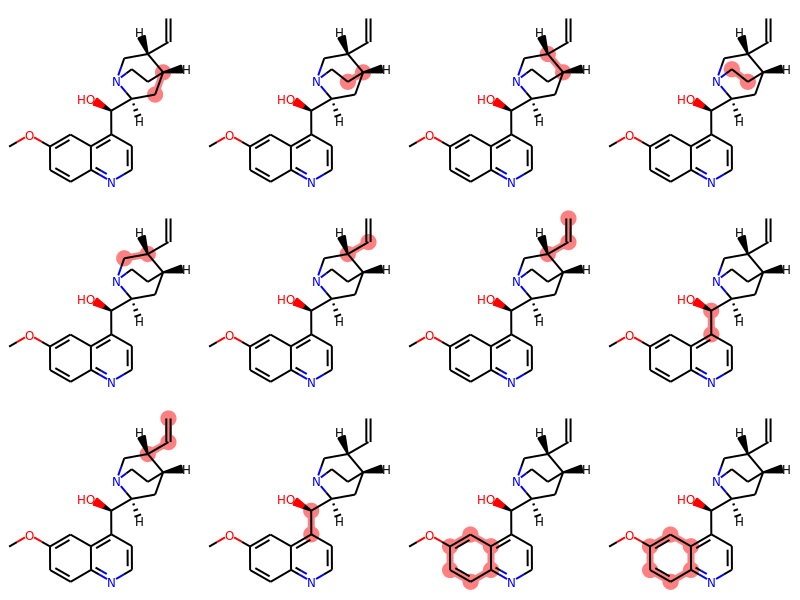

In [179]:
pic = Draw.MolsToGridImage(mols[50:], molsPerRow=4, subImgSize=(200, 200),
                           #legends = labels,
                           #useSVG = True, 
                           highlightAtomLists = matches[50:])
pic.save('quinine_subserach2.png')
pic

In [73]:
xanthene.GetSubstructMatches(r1[1].prod)

((0, 1, 2, 3, 4, 5), (7, 8, 9, 10, 11, 12))

In [990]:
xanthene.GetSubstructMatches(r1[5].prod)

((13, 8, 7, 0, 5, 6),)